In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)
#TEST CHANGE

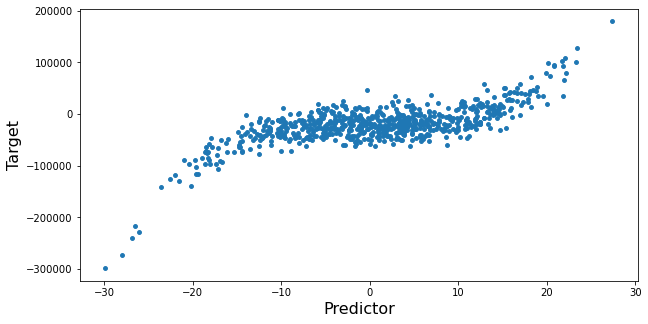

In [ ]:
# creating a dataset with curvilinear relationship
x=10*np.random.normal(0,1,700)
y=10*(x**3)+np.random.normal(-20000,20000,700)

# plotting dataset
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

#### Model With Linear Regression

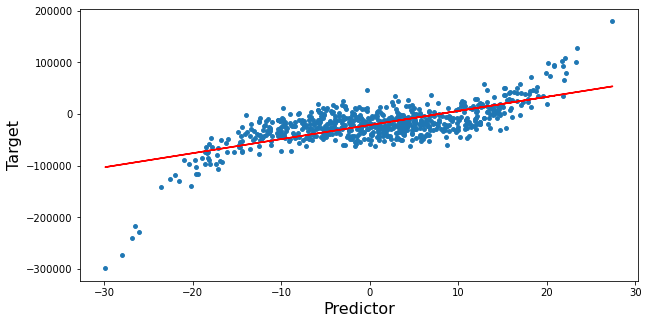

RMSE for Linear Regression=> 165.99304161219996


In [ ]:
#Linear Regression Model of Data
lm=LinearRegression()
lm.fit(x.reshape(-1,1),y.reshape(-1,1))

#Plot
y_pred=lm.predict(x.reshape(-1,1))

# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()
print('RMSE for Linear Regression=>',mean_squared_error(y,y_pred, squared=False))

### High Bias and Underfitted

The above model is underfitted - it obviously isn't all that close of a match to the data, though it roughly approximates it. 

### Polynomial Features

We can attempt to make a more fitted model by changing from a simple linear regression to a polynomial of higher order - thus allowing our model to curve, and hopefully be a better predictor. 

In [ ]:
poly=[('polynomial',PolynomialFeatures(degree=3)),('model',LinearRegression())]
pipe=Pipeline(poly)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

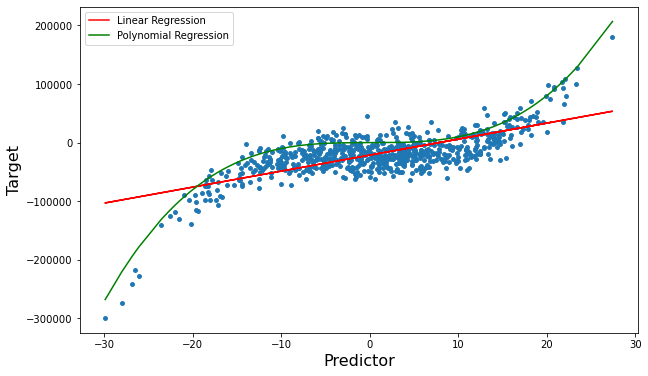

In [ ]:
poly_pred=pipe.predict(x.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

### High Variance and Low Bias

The new model is much more fitted to the data. 

### High Degree Polynomial

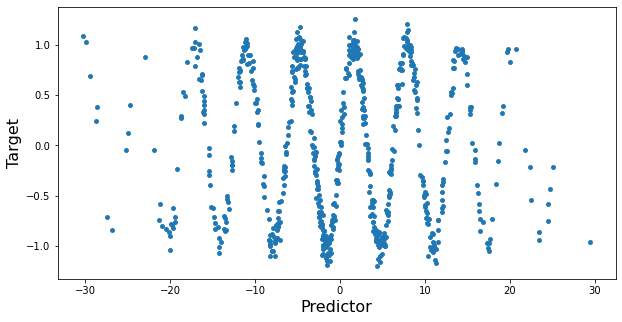

In [ ]:
x = 10*np.random.normal(0,1,700)
y = np.sin(x) + 0.1 * np.random.randn(700)
# plotting dataset
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

RMSE 2 0.726113688961803
RMSE 3 0.7232558425742708
RMSE 4 0.7233796753106819
RMSE 5 0.7279199251065911


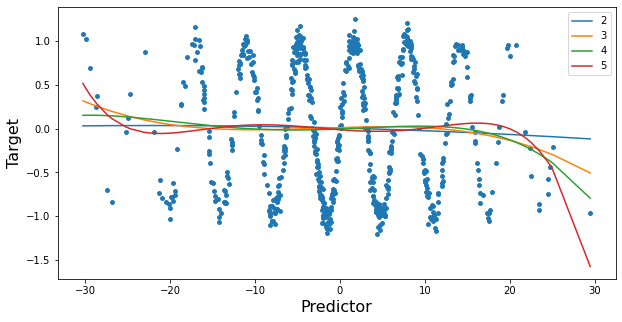

In [ ]:
poly=[('polynomial',PolynomialFeatures(degree=3)),('model',LinearRegression())]
pipe=Pipeline(poly)

#degrees = [2,3,4,5,6,7,8,9,10,11,12,13,14]
degrees = [2,3,4,5]
params = {'polynomial__degree':degrees}
 
reg = GridSearchCV(pipe, param_grid=params, cv=3) 
reg.fit(x.reshape(-1,1),y.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)

for deg in degrees:
    poly=[('polynomial',PolynomialFeatures(degree=deg)),('model',LinearRegression())]
    pipe = Pipeline(poly)
    pipe.fit(x.reshape(-1,1),y.reshape(-1,1))
    poly_pred = pipe.predict(x.reshape(-1,1))
    #sorting predicted values with respect to predictor
    sorted_zip = sorted(zip(x,poly_pred))
    x_poly, poly_pred = zip(*sorted_zip)
    #plotting predictions
    plt.plot(x_poly,poly_pred,label=deg)
    print('RMSE', deg,mean_squared_error(y,poly_pred, squared=False))
plt.legend()
plt.show()
